<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/MobilePriceClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

100%|██████████| 70.6k/70.6k [00:00<00:00, 8.37MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iabhishekofficial/mobile-price-classification/versions/1


In [2]:
import os

os.listdir(path)

['train.csv', 'test.csv']

In [3]:
import pandas as pd

df= pd.read_csv(os.path.join(path, "train.csv"))
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


#EDA (Exploratory Data Analysis)

In [4]:
pd.set_option('display.max_columns', None)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
df.shape

(2000, 21)

In [6]:
df.isna().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [9]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [10]:
df['price_range'].value_counts()

,count
price_range,
1,500
2,500
3,500
0,500


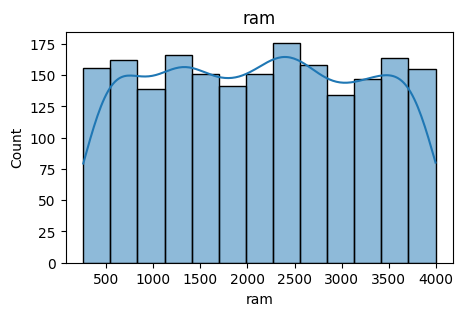

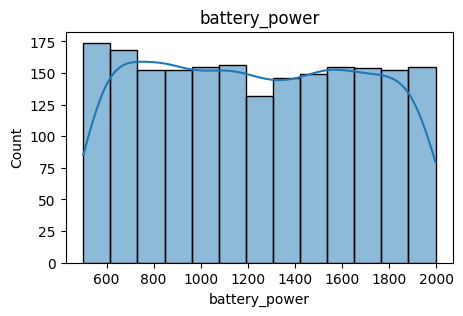

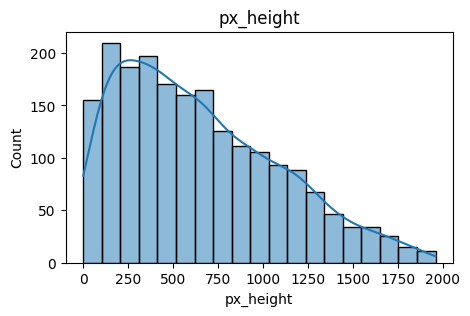

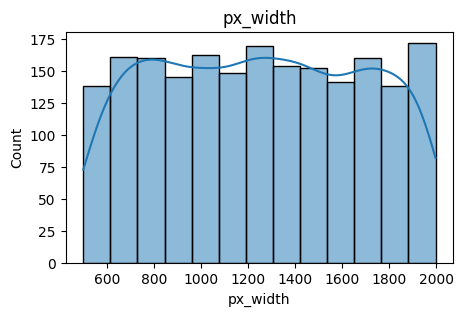

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
features = ['ram', 'battery_power', 'px_height', 'px_width']

for col in features:
    plt.figure(figsize=(5,3))
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


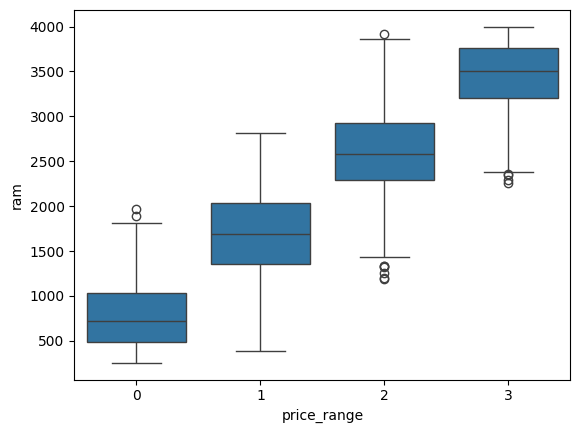

In [12]:
sns.boxplot(x='price_range', y='ram', data=df)
plt.show()


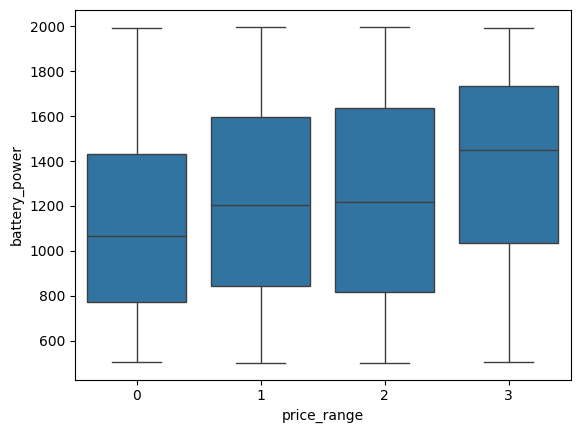

In [13]:
sns.boxplot(x='price_range', y='battery_power', data=df)
plt.show()


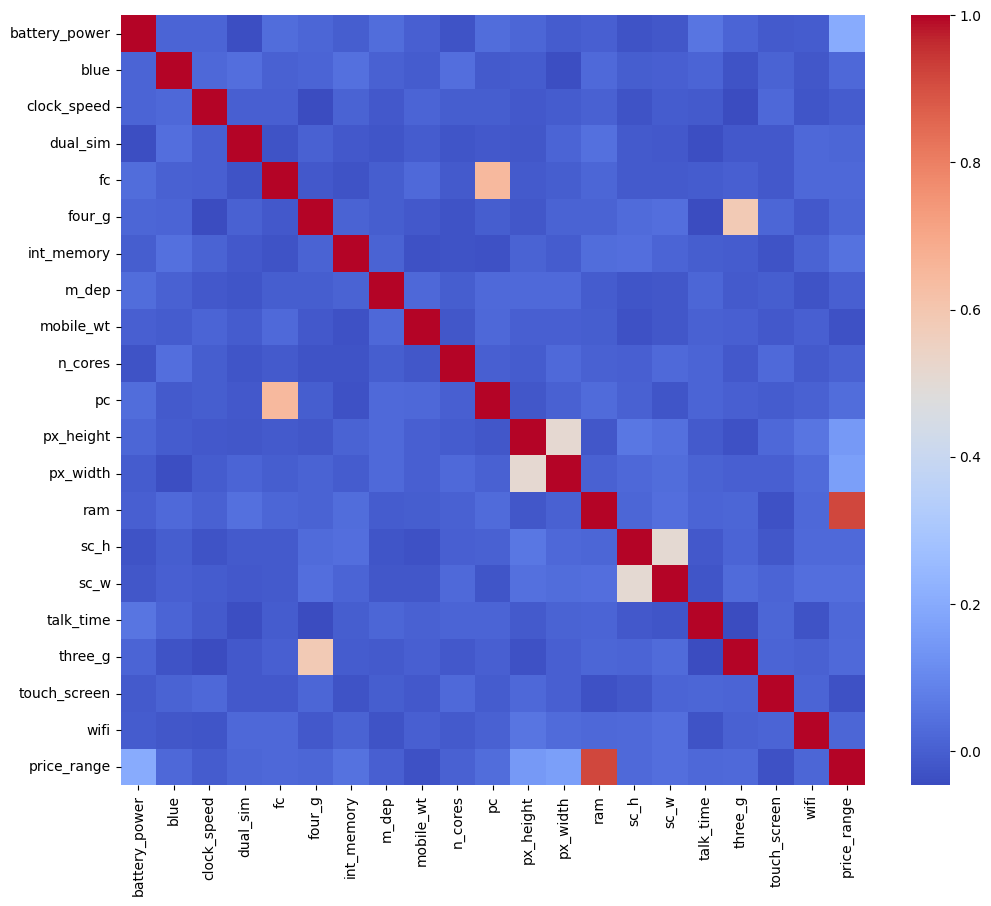

In [16]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

In [18]:
df.corr()['price_range'].sort_values(ascending=False)

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
px_width,0.165818
px_height,0.148858
int_memory,0.044435
sc_w,0.038711
pc,0.033599
three_g,0.023611
sc_h,0.022986


#Logistic Regression

In [19]:
X = df.drop("price_range", axis=1)
y = df["price_range"].copy()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
import numpy as np
num_feature=X_train.select_dtypes(include=[np.number]).columns

In [22]:
num_feature

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [23]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [24]:
num_pipeline=Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

transformer=ColumnTransformer([
    ('num',num_pipeline, num_feature)
],remainder='passthrough')

estimator= LogisticRegression(max_iter=1000,solver='lbfgs')

full_pipeline =Pipeline([
    ('preprocessing', transformer),
    ('estimator',estimator)
])


In [25]:
full_pipeline.fit(X_train, y_train)
y_pred = full_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.965
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       100
           1       0.96      0.96      0.96       100
           2       0.95      0.94      0.94       100
           3       0.96      0.98      0.97       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.96       400
weighted avg       0.97      0.96      0.96       400



In [26]:
full_pipeline.score(X_test, y_test), full_pipeline.score(X_train, y_train)

(0.965, 0.976875)

In [27]:
full_pipeline.predict(X_test.iloc[:10])

array([3, 1, 0, 2, 3, 2, 0, 0, 1, 0])

In [28]:
y_test.iloc[:10]

,price_range
501,3
1924,1
1710,0
547,2
496,3
375,2
652,0
1566,0
261,1
1116,0


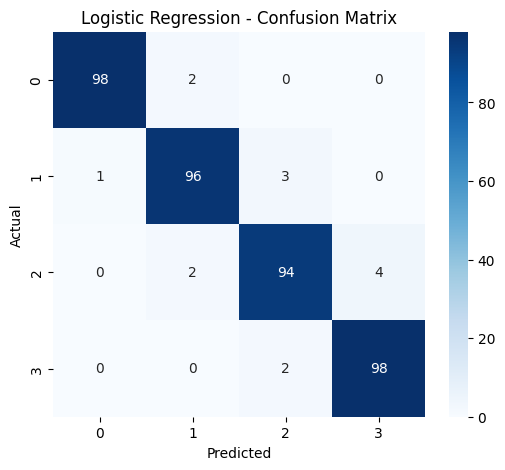

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# predict
y_pred = full_pipeline.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()


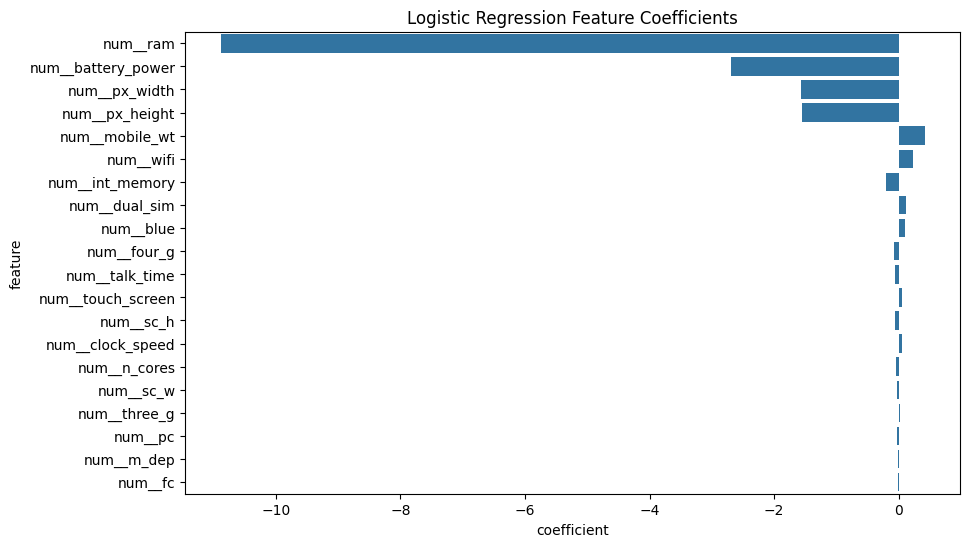

In [32]:
# Transformer-dan feature adlarını çıxarmaq
feature_names = full_pipeline.named_steps['preprocessing'].get_feature_names_out()

# Estimator-dan coefficients---w
coefficients = full_pipeline.named_steps['estimator'].coef_[0]

coef_df = pd.DataFrame({
    'feature': feature_names,
    'coefficient': coefficients
}).sort_values(by='coefficient', key=abs, ascending=False)

# Vizual
plt.figure(figsize=(10,6))
sns.barplot(x='coefficient', y='feature', data=coef_df)
plt.title("Logistic Regression Feature Coefficients")
plt.show()


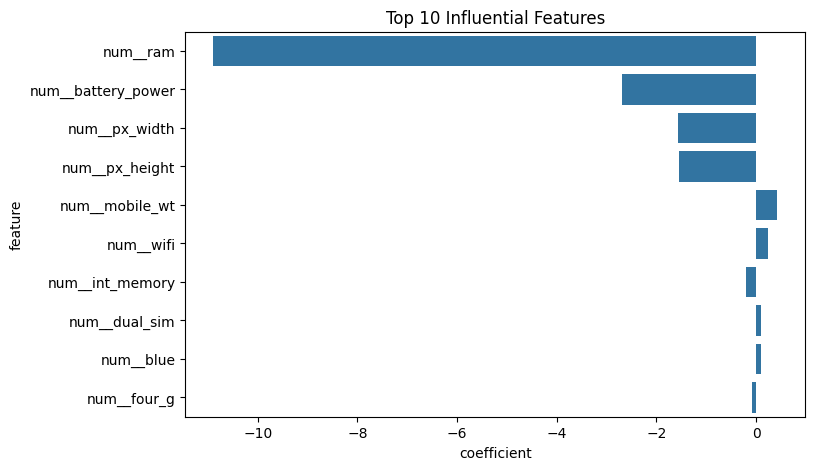

In [33]:
top_features = coef_df.head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='coefficient', y='feature', data=top_features)
plt.title("Top 10 Influential Features")
plt.show()


#RandomForestClassifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest estimator
rf_estimator = RandomForestClassifier(
    n_estimators=200,  # ağac sayı
    max_depth=None,    # hər ağac tam böyüyür
    random_state=42
)


In [35]:
rf_pipeline = Pipeline([
    ('preprocessing', transformer),
    ('rf', rf_estimator)
])

In [36]:
rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8775
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       100
           1       0.81      0.84      0.82       100
           2       0.82      0.79      0.81       100
           3       0.94      0.93      0.93       100

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400



In [37]:
rf_pipeline.score(X_test, y_test), rf_pipeline.score(X_train, y_train)

(0.8775, 1.0)

In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'rf__n_estimators': [200, 500],
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_leaf': [1, 2, 5],
    'rf__max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Best params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 2, 'rf__n_estimators': 200}
Best score: 0.8643663057201013


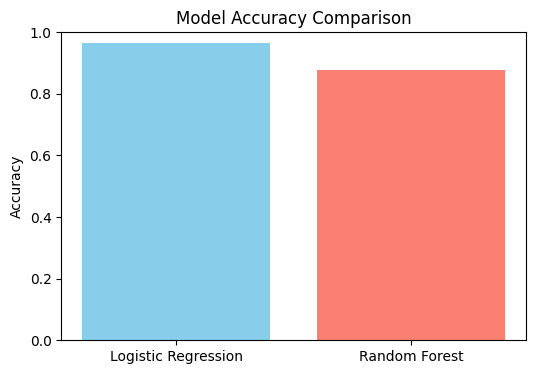

In [ ]:
import matplotlib.pyplot as plt

# Accuracy-ləri saxlayırıq
accuracy_scores = {
    'Logistic Regression': 0.965,
    'Random Forest': 0.8775
}

models = list(accuracy_scores.keys())
scores = list(accuracy_scores.values())

plt.figure(figsize=(6,4))
plt.bar(models, scores, color=['skyblue', 'salmon'])
plt.ylim(0,1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


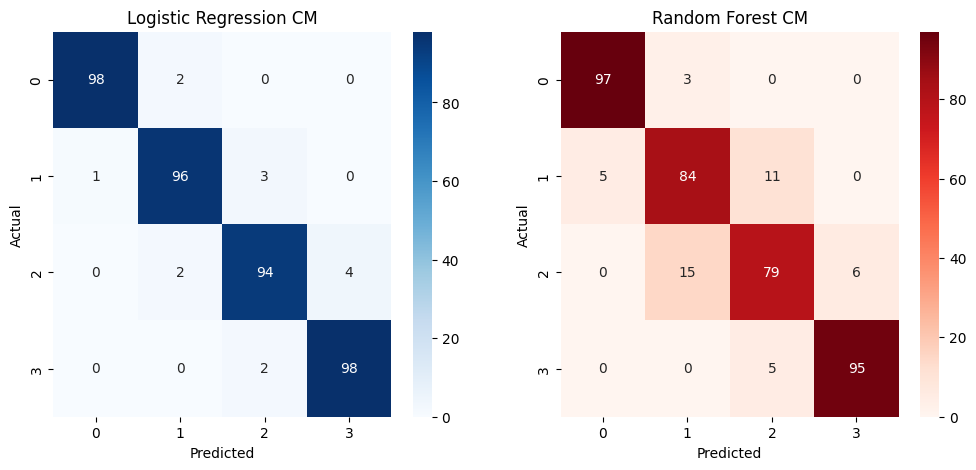

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Logistic Regression
cm_log = confusion_matrix(y_test, full_pipeline.predict(X_test))
# Random Forest (tuning sonrası)
rf_pipeline.set_params(rf__max_depth=None, rf__max_features='sqrt', rf__min_samples_leaf=2, rf__n_estimators=200)
rf_pipeline.fit(X_train, y_train)
cm_rf = confusion_matrix(y_test, rf_pipeline.predict(X_test))

fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression CM")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1])
axes[1].set_title("Random Forest CM")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.show()


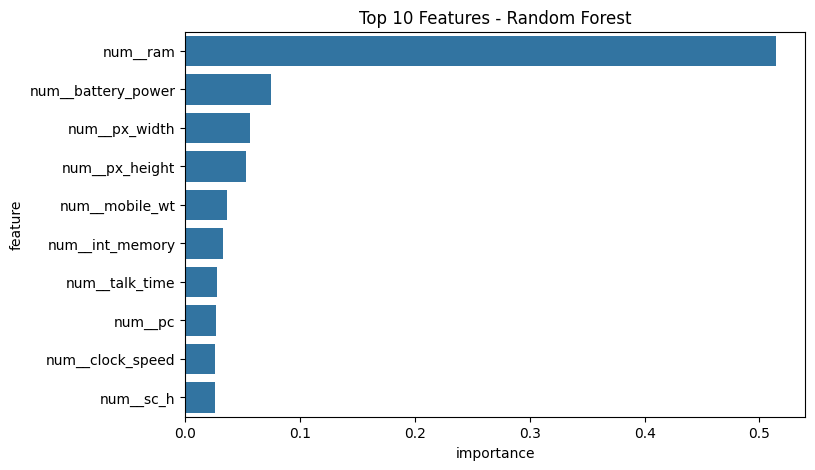

In [ ]:
rf_model = rf_pipeline.named_steps['rf']
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
}).sort_values(by='importance', ascending=False).head(10)

plt.figure(figsize=(8,5))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title("Top 10 Features - Random Forest")
plt.show()


In [ ]:
import pandas as pd
testdf= pd.read_csv(os.path.join(path, "test.csv"))
testdf.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
# X = bütün train features, y = target
X = df.drop("price_range", axis=1)
y = df["price_range"]

# Final pipeline (Logistic Regression)
full_pipeline.fit(X, y)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object'))])),
                ('estimator',
                 LogisticRegression(max_iter=1000, multi_class='auto'))])

In [ ]:
# Predict price_range for test.csv
test_preds = full_pipeline.predict(testdf)

# Nəticəni dataframe-ə çevirərək Kaggle submission üçün
submission = pd.DataFrame({
    "id": testdf["id"],   # test.csv-dən id column
    "price_range": test_preds
})


submission.head()


,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


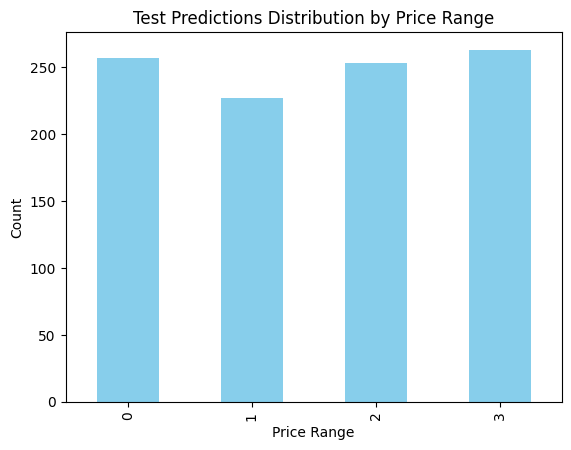

In [ ]:
import matplotlib.pyplot as plt

# price_range distribution
submission['price_range'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.title('Test Predictions Distribution by Price Range')
plt.show()


In [ ]:
submission['price_range'].value_counts().sort_index()


,count
price_range,
0,257
1,227
2,253
3,263


In [ ]:
submission.head()


,id,price_range
0,1,3
1,2,3
2,3,2
3,4,3
4,5,1


In [ ]:
submission.to_csv("submission.csv", index=False)